### Старая структура

Структура имела дефект в сущности sup_to_prod. По-сути она являлась бесползной, так как не давала информации сколько товаров за день продал каждый постащик, ввиду остуствия привязки каждого товара к конкретному поставщику.

**product_categories**  
|- id  
|- product_category  

**products**  
|- id  
|- name  
|- product_category_id  
|- country_from  

**sup_to_prod**  
|- id  
|- product_id  
|- supplier_id  

**sell**  
|- id  
|- product_id  
|- quantity  
|- sell_date  

**suppliers**  
|- id  
|- supplier_name  
|- address  

### Новая структура

**product_categories**  
|- id  
|- product_category 

**products**  
|- id  
|- name  
|- product_category_id  
|- country_from 

**sell**  
|- id  
|- product_id  
|- <span style="color: red">supplier_id</span>  
|- quantity  
|- sell_date  

**suppliers**  
|- id  
|- supplier_name  
|- address 

In [1]:
import pandas as pd
from random import randint
from random import sample
from random import uniform
import datetime
import numpy as np

In [2]:
# Считываем сущность product_category
categories = pd.read_excel('NewData.xlsx', sheet_name='sr.1', index_col='id')
categories

,product_category
id,
1,Телефон
2,Монитор
3,Мышка
4,Клавиатура
5,Ноутбук
6,Игровая приставка
7,Наушники


In [3]:
# Считываем сущность products
products = pd.read_excel('NewData.xlsx', sheet_name='sr.2', index_col='id')
print(products.shape)
products.head()

(157, 3)


,name,product_category_id,country_from
id,,,
1,Realme 9 Pro 8/128 Gb,1,Китай
2,Redmi Note 10 Pro 8/128 Gb,1,Китай
3,Poco X3 Pro 8/256 Gb,1,Китай
4,Redmi Note 11 Pro 5G 8/128 GB,1,Китай
5,Honor 50 8/128 Gb,1,Китай


In [4]:
# Считываем сущность sells - она пустая
sells = pd.read_excel('NewData.xlsx', sheet_name='sr.3', index_col='id')
sells

,product_id,supplier_id,quantity,sell_date
id,,,,


In [9]:
# Считываем сущность suppliers 
suppliers = pd.read_excel('NewData.xlsx', sheet_name='sr.4', index_col='id')
suppliers

,supplier_name,address
id,,
1,Поставщик_1,Индия
2,Поставщик_2,США
3,Поставщик_3,Корея
4,Поставщик_4,Тайвань
5,Поставщик_5,Нидерланды
6,Поставщик_6,Швейцария
7,Поставщик_7,Япония
8,Поставщик_8,Англия
9,Поставщик_9,Турция


In [11]:
# Считываем сущность sup_to_prod - она пустая
# sup_to_prod = pd.read_excel('Data.xlsx', sheet_name='sr.5', index_col='id')
# sup_to_prod

# Создаем рабочую таблицу sup_to_prod
sup_to_prod = pd.DataFrame(columns=['supplier_id', 'product_id'])
sup_to_prod

,supplier_id,product_id


In [12]:
# Заполняем sup_to_prod
# Пусть каждый Поставщик имеет в своем каталоге от 30 до 45 наименований товаров
for sup_id in suppliers['supplier_name'].index:
    sup_products = sample(products.index.to_list(), randint(30, 45))
    for prod_id in sup_products:
        sup_to_prod.loc[len(sup_to_prod.index)] = [sup_id, prod_id]

In [18]:
sup_to_prod.loc[25:40]

,supplier_id,product_id
25,1,44
26,1,113
27,1,62
28,1,109
29,1,38
30,1,152
31,1,30
32,1,67
33,2,2
34,2,128


In [19]:
# задаем праздничные даты за 2019 год
important_dates_list_first = ['2019-01-01', '2019-02-23', '2019-03-08', '2019-05-09', '2019-06-12']
important_dates_list_first = list(map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'), important_dates_list_first))

# задаем праздничные даты за 2019, 2020, 2021, 2022 годы
important_dates_list = []
for i in range(4):
    for day in important_dates_list_first:
        important_dates_list.append(day + datetime.timedelta(days=365*i))

# создаем датафрейм и задаем для каждой праздничной даты двух недельный период акций
important_dates = pd.DataFrame(important_dates_list, columns=['Date'])[:16]
important_dates['StartDate'] = important_dates['Date'].apply(lambda x: x - datetime.timedelta(days=7))
important_dates['FinishDate'] = important_dates['Date'].apply(lambda x: x + datetime.timedelta(days=7))

# вытаскиваем начало и конец временного среза
start_day = important_dates.loc[0, 'StartDate']
finish_day = important_dates.loc[important_dates.index[-1], 'FinishDate']

# считаем количество дней во временном срезе и задаем все дни
all_time = (finish_day - start_day).days
all_days = [start_day + datetime.timedelta(days=day_num) for day_num in range(all_time+1)]

print(all_time)
important_dates

1109


,Date,StartDate,FinishDate
0,2019-01-01,2018-12-25,2019-01-08
1,2019-02-23,2019-02-16,2019-03-02
2,2019-03-08,2019-03-01,2019-03-15
3,2019-05-09,2019-05-02,2019-05-16
4,2019-06-12,2019-06-05,2019-06-19
5,2020-01-01,2019-12-25,2020-01-08
6,2020-02-23,2020-02-16,2020-03-01
7,2020-03-07,2020-02-29,2020-03-14
8,2020-05-08,2020-05-01,2020-05-15
9,2020-06-11,2020-06-04,2020-06-18


In [20]:
# создаем вспомагательную таблицу quality
# сзадаем каждому товару общее количество продаж
quality =pd.DataFrame(
    {
        'product_id': products.index,
        'quality': [randint(10000, 200000) for i in products.index] # количество продаж от 10 тыс. до 200 тыс.
    }
)

# задаем среднее количество продаж за день для каждого товара
quality['mean_day_quality'] = quality['quality'].apply(lambda x: x // all_time)

# задаем мощность товара, т.е. восколько раз максимально увеличатся продажи в праздничные дни
quality['power'] = [uniform(1.5, 3) for i in products.index]

quality.head()


,product_id,quality,mean_day_quality,power
0,1,81363,73,1.627006
1,2,74430,67,2.405283
2,3,171104,154,2.673161
3,4,73592,66,2.927210
4,5,131735,118,2.842937


In [21]:
# TODO: задать все товары каждого поставщика для каждого дня
# TODO: задаем все дни для каждого товара каждого поставщика

# заполняем sells
sels_product_id = quality.product_id.to_list() * len(all_days) # задаем все товары для каждого дня
sels_sell_date = all_days * len(quality.product_id) # задаем все дни для каждого товара

# TODO: дополнительно заполнить постащиками
sells['product_id'] = sels_product_id
sells['sell_date'] = sels_sell_date

sells.head()

,product_id,supplier_id,quantity,sell_date
id,,,,
0,1,NaN,NaN,2018-12-25
1,2,NaN,NaN,2018-12-26
2,3,NaN,NaN,2018-12-27
3,4,NaN,NaN,2018-12-28
4,5,NaN,NaN,2018-12-29


In [22]:
# заполняем знаковые даты

for prod_id in quality.product_id:
    for imp_day in important_dates.index:
        # ищем праздничные периоды для товара в таблице sells
        sdt = important_dates.loc[imp_day].StartDate
        fdt = important_dates.loc[imp_day].FinishDate
        # TODO: нужно добавить условие на supplier_id
        imp_prd = sells.loc[(sells.sell_date >= sdt) & (sells.sell_date <= fdt) & (sells.product_id == prod_id)].index

        # достаем из нормального распредления продажи для праздничных дней
        size = len(imp_prd)
        norm_value = quality.loc[quality.product_id == prod_id, 'mean_day_quality']
        # TODO: нужно как-то посчитать сколько поставщиков есть у товара -> sup_number
        # TODO: нужно norm_value поделить на sup_number -> mean_quality_forsup_byprod - среднее значение продаж для поставщика по товару
        # TODO: использовать mean_quality_forsup_byprod вместо norm_value снизу
        mu = norm_value * quality.loc[quality.product_id == prod_id, 'power'] # увеличенные продажи
        sigma = mu - norm_value # разброс до значений обыкновенного дня
        sells.loc[imp_prd, 'quantity'] = [int(abs(value)) for value in np.random.normal(loc=mu, scale=sigma, size=size)]

In [23]:
# заполняем остальные данные

for prod_id in quality.product_id:
    # находим обыкновенные дни
    # TODO: нужно добавить условие на supplier_id
    smp_day = sells.loc[(sells.quantity.isna()) & (sells.product_id==prod_id)].index

    # достаем из нормального распредления продажи для обыкновенных дней
    size = len(smp_day)
    mu = quality.loc[quality.product_id == prod_id, 'mean_day_quality'] # уровень прожаж обыкновенного дня
    # TODO: нужно как-то посчитать сколько поставщиков есть у товара -> sup_number
    # TODO: нужно mu поделить на sup_number -> mean_quality_forsup_byprod - среднее значение продаж для поставщика по товару
    # TODO: использовать mean_quality_forsup_byprod вместо mu снизу
    sigma = mu * 0.2 # разброс в 20%
    sells.loc[smp_day, 'quantity'] = [int(abs(value)) for value in np.random.normal(loc=mu, scale=sigma, size=size)]

In [24]:
sells.head()

,product_id,supplier_id,quantity,sell_date
id,,,,
0,1,NaN,174,2018-12-25
1,2,NaN,95,2018-12-26
2,3,NaN,321,2018-12-27
3,4,NaN,213,2018-12-28
4,5,NaN,208,2018-12-29


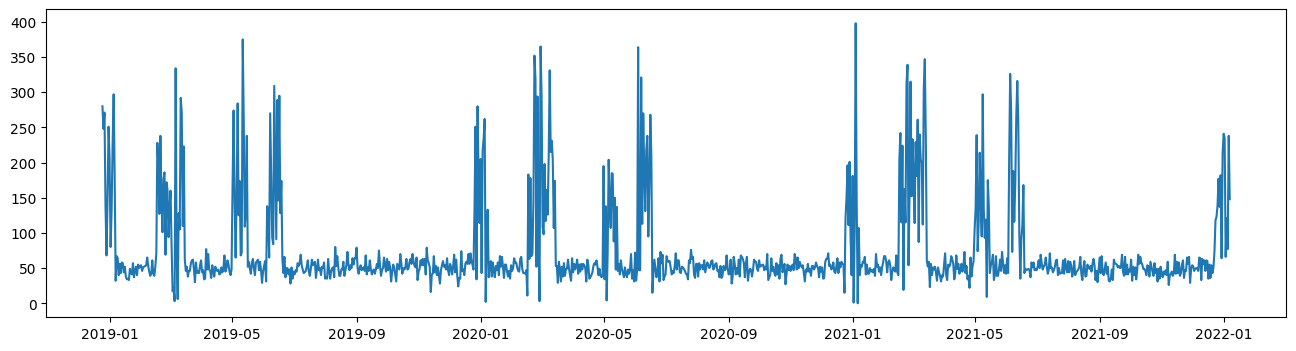

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(sells[sells.product_id==50].sort_values('sell_date').sell_date, sells[sells.product_id==50].sort_values('sell_date').quantity)
plt.show()

In [17]:
# # записываем данные в файл DataFull.xlsx

# writer = pd.ExcelWriter('DataFull.xlsx', engine='xlsxwriter')

# categories.to_excel(writer, sheet_name='sr.1')
# products.to_excel(writer, sheet_name='sr.2')
# sells.to_excel(writer, sheet_name='sr.3')
# suppliers.to_excel(writer, sheet_name='sr.4')
# sup_to_prod.to_excel(writer, sheet_name='sr.5')

# writer.save()